In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import os

/home/rikk/anaconda3/envs/stats/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [44]:
# Set filepath for model
filepath = "../models/anomaly_autoencoder.h5"

# Read in the data
df_fraud = pd.read_csv("../data/fraud.csv")
df_validate = pd.read_csv("../data/not_fraud_validation.csv")
components = ["V%d" % n for n in range(1, 29)]
fraud_components = df_fraud[components].as_matrix()
validation_components = df_validate[components].as_matrix()

In [45]:
# Define and load the model

features = Input(shape=(28, ))

encoded = Dense(28, activation='relu')(features)
encoded = Dense(12, activation='relu')(encoded)
encoded = Dense(6, activation='relu')(encoded)
decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(26, activation='relu')(decoded)
decoded = Dense(28, activation='tanh')(decoded)

autoencoder = Model(features, decoded)

autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

# Load model if it exists
if os.path.isfile(filepath):
    autoencoder.load_weights(filepath)

In [46]:
fraud_loss = []
validation_loss = []

for i in range(0, fraud_components.shape[0]):
    vec = fraud_components[i,:].reshape((1, 28))
    fraud_loss.append(autoencoder.evaluate(x=vec, y=vec, batch_size=1, verbose=0))
    
for i in range(0, validation_components.shape[0]):
    vec = validation_components[i,:].reshape((1, 28))
    validation_loss.append(autoencoder.evaluate(x=vec, y=vec, batch_size=1, verbose=0))
    
print(np.mean(fraud_loss))
print(np.mean(validation_loss))
    


26.74875364420799
0.4843881445815787


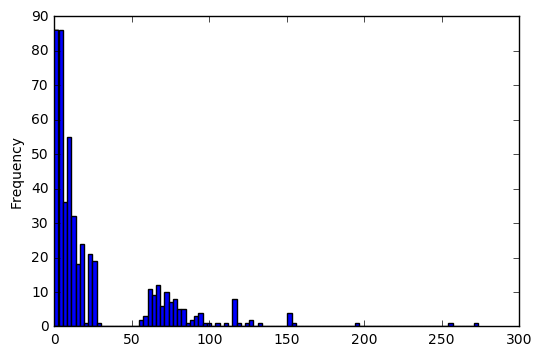

In [47]:
pd.Series(fraud_loss).plot.hist(bins=100)

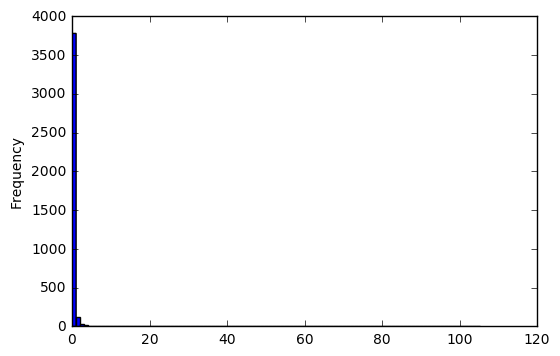

In [43]:

pd.Series(validation_loss).plot.hist(bins=100)

In [50]:
val = pd.Series(validation_loss)
(val > 2).sum() / len(validation_loss)

0.0265

In [51]:
val = pd.Series(fraud_loss)
(val > 2).sum() / len(fraud_loss)

0.8414634146341463